## Sub-task 3: Stroke risk Prediction

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')

# Read the data from the CSV file
df = pd.read_csv(r"dataset\Dataset_raw.csv")

# Check the number of data points in the data set
print("Data Points: ", len(df))

Data Points:  620


In [3]:
df.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
0,2448,196.0,52.0,100.0,62.0,6438.0,0.0,4628,2.0,NaN
1,6238,223.0,58.0,122.0,75.0,8766.0,0.0,4344,2.0,28.5
2,11252,232.0,58.0,131.0,70.0,8766.0,0.0,4285,2.0,24.6
3,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
4,12806,208.0,57.0,127.0,75.0,8766.0,0.0,4289,2.0,22.0


In [4]:
df.isnull().sum()

RANDID     0
TOTCHOL    8
AGE        4
SYSBP      5
DIABP      3
TIMEMI     1
CIGPDAY    2
TIME       0
STROKE     2
BMI        3
dtype: int64

In [5]:
# handle missing values by dropping them
df.dropna(inplace=True)

In [6]:
# Select relevant features based on Article #1 linkand domain knowledge (e.g., blood pressure, cholesterol, smoking)
selected_features = ['AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'CIGPDAY']
X = df[selected_features]
y = df['STROKE']

### Feature Engineering
Categorical Conversions as per article with refrence to the articles.

In [7]:
# 1. Cholesterol Categories (refer to Article #2)
def categorize_cholesterol(chol):
    if chol < 200:
        return 'Normal'
    elif chol < 240:
        return 'Borderline High'
    else:
        return 'High'

X['TOTCHOL_category'] = X['TOTCHOL'].apply(categorize_cholesterol)

In [8]:
# 2. Blood Pressure Categories (refer to Article #3)
def categorize_bp(sys, dia):
    if sys < 120 and dia < 80:
        return 'Normal'
    elif sys < 130 and dia < 85:
        return 'Elevated'
    elif sys < 140 and dia < 90:
        return 'High'
    else:
        return 'Hypertensive'

X['BP_category'] = X.apply(lambda row: categorize_bp(row['SYSBP'], row['DIABP']), axis=1)

In [9]:
# Drop original numerical features
X.drop(columns=['TOTCHOL', 'SYSBP', 'DIABP'], inplace=True)

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['TOTCHOL_category', 'BP_category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Function to fit and assess a model
def fit_and_assess(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions)
    rec = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")

# Fit and assess various models
print("Logistic Regression:")
fit_and_assess(LogisticRegression(max_iter=1000))

print("\nDecision Tree:")
fit_and_assess(DecisionTreeClassifier(random_state=42))

print("\nRandom Forest:")
fit_and_assess(RandomForestClassifier(random_state=42))

Logistic Regression:
Accuracy: 0.86
Precision: 0.83
Recall: 0.88
F1-score: 0.85
AUC: 0.86

Decision Tree:
Accuracy: 0.79
Precision: 0.77
Recall: 0.79
F1-score: 0.78
AUC: 0.79

Random Forest:
Accuracy: 0.85
Precision: 0.84
Recall: 0.84
F1-score: 0.84
AUC: 0.85


Accuracy: 0.85
Precision: 0.84
Recall: 0.84
F1-score: 0.84
AUC: 0.85


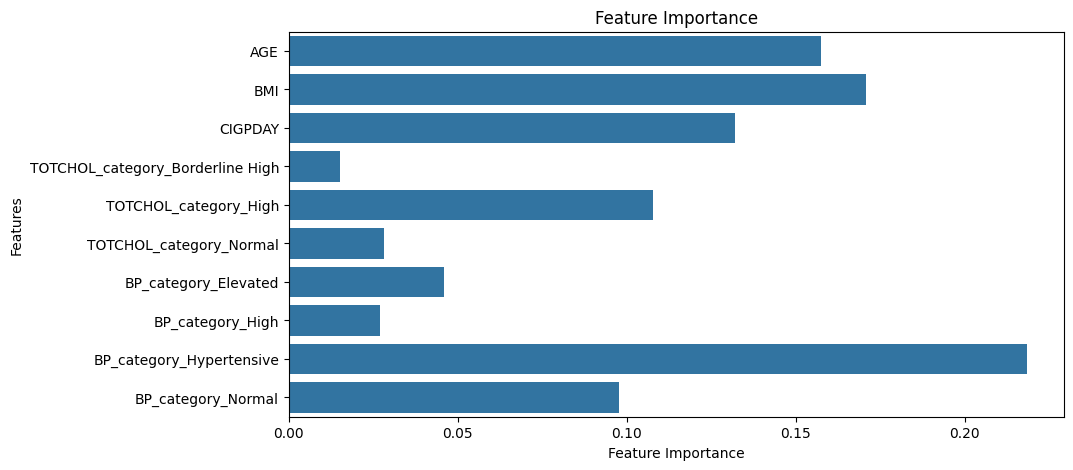

In [12]:
# Visualize feature importance  
# (Example with Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()

### Stroke Risk Prediction: A Glimpse into the Deep Learning Journey

This project seeks to develop a machine learning model that can predict the likelihood of stroke in patients. We aim to use over 600 cases to develop a precise tool to help healthcare professionals identify those at increased risk for stroke.

#### 1. Feature Selection for a Robust Model

Features form the back-bone of any predictive model. With the medical knowledge and insights gathered from the article "Stroke Risk Factors and Prevention" by Better Health Victoria, we chose the following significant factors as our choice:

- **Age**: The risk of stroke increases with age.
- **Blood Pressure**: Hypertension definitely increases the chances of blood vessel rupture and stroke.
- **Cholesterol**: High cholesterol levels contribute to plaque formation, which increases the risk of stroke by constricting blood vessels.
- **Body Mass Index (BMI)**: Obesity is associated with hypertension, diabetes, and cardiovascular disease, which are all risks for stroke.
- **Tobacco Smoking**: Tobacco smoke damages blood vessels and increases risks for blood clots and stroke.

These evidence-based medical variables form the bedrock of our predictive model.
2. Feature Engineering

There is information to be gleaned from raw counts, but categorization can better enable the model to pick out complex relationships.

- **Cholesterol Categorization**: Using MedlinePlus, we categorized the cholesterol levels as "Normal," "Borderline High," and "High."
- **Blood Pressure Categorization**: Based on Stroke Association UK, we categorized blood pressure as "Normal," "Elevated," "High," and "Hypertensive."

These enhance the interpretability of the model and capture non-linear relationships between variables and stroke risk.

#### 3. Model Selection

We tested a range of machine learning algorithms to identify the best model:

- **Logistic Regression**: A traditional statistical model that is a baseline to compare with.
- **Decision Tree**: A simulated model of human decision based on branching rules that are associated with the input data.
- **Random Forest**: An ensemble method that combines multiple decision trees to improve the accuracy and avoid overfitting.

This helped us to identify which model is the most effective and for what specific reason.

#### 4. Evaluation and Validation of Results

We have concentrated on the following key metrics for model performance evaluation:

- **Accuracy**: The total proportion of correct predictions.
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall (Sensitivity)**: The proportion of true positive predictions among all actual stroke cases.
- **Specificity**: The ratio of true negative predictions to all negative predictions.
- **F1-score**: The harmonic mean of precision and recall.
- **AUC (Area Under the ROC Curve)**: A measure of the model's ability to distinguish between positive and negative cases.

By carefully evaluating these metrics, we ensured our model performs well for both high-risk and low-risk patients, crucial for effective clinical decision-making.